# Objectives
* Explore generally the dataset.
* Assess data quality.
* Assess correlation between features.
* Perform initial review of feature importance.

# Import packages

In [1]:
# Ensure inline plotting in Jupyter notebooks
%matplotlib inline
# import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder

# Load Dataset

## Change working directory
We need to change the working directory from its current folder to its parent folder

  * We access the current directory with os.getcwd()

We want to make the parent of the current directory the new current directory

    * os.path.dirname() gets the parent directory
    * os.chir() defines the new current directory

In [2]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\issam\\Housing-market-analysis.1\\jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\issam\\Housing-market-analysis.1'

## Load Dataset

In [5]:
# Load dataset
df = pd.read_csv(f"{current_dir}\inputs\housing-prices-data\house_prices_records.csv")
# df = df.sample(frac=0.2, random_state=101) # inputs/housing-prices-data/house_prices_records.csv

print(df.shape)
print(df.head(5)) 
df.info()

# I considered sampling and didn't because the dataset is 1460 rows, and therefore 
# I can be confident that there will be no computing performance issues.

(1460, 24)
   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   
3        540            NaN         642          Unf  ...         60.0   
4        490            0.0         836          RFn  ...         84.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0

---

# Data Exploration 
Exploring variables that appear to be empty and exploring the data type.

In [6]:
df.isnull().sum()

1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure       38
BsmtFinSF1          0
BsmtFinType1      145
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      235
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

### Observation
EnclosedPorch and WoodDeckSF both have very large proportions of null values. We will consider this later when we decide which variables to keep for further analysis.

In [7]:
print(df.dtypes['EnclosedPorch'], df.dtypes['WoodDeckSF'])

float64 float64


# Addressing missing data and scaling numerical variables
* Using feature_engine to replace all numerical & categorical missing data
* Using sklearn.preprocessing to scale all the numerical variables

In [8]:
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import StandardScaler


# Separate columns by data type
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numeric columns using median
numeric_imputer = MeanMedianImputer(imputation_method='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values for categorical columns using most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

---

* All missing columns have been filled in 

In [9]:
df.head(20)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0        856     854.0           3.0           No         706          GLQ   
1       1262       0.0           3.0           Gd         978          ALQ   
2        920     866.0           3.0           Mn         486          GLQ   
3        961       0.0           3.0           No         216          ALQ   
4       1145       0.0           4.0           Av         655          GLQ   
5        796     566.0           1.0           No         732          GLQ   
6       1694       0.0           3.0           Av        1369          GLQ   
7       1107     983.0           3.0           Mn         859          ALQ   
8       1022     752.0           2.0           No           0          Unf   
9       1077       0.0           2.0           No         851          GLQ   
10      1040       0.0           3.0           No         906          Rec   
11      1182    1142.0           4.0           No         998          Unf   
12       912       0.0           2.0           No         737          ALQ   
13      1494       0.0           3.0           Av           0          Unf   
14      1253       0.0           3.0           No         733          BLQ   
15       854       0.0           2.0           No           0          Unf   
16      1004       0.0           2.0           No         578          ALQ   
17      1296       0.0           2.0           No           0          Unf   
18      1114       0.0           3.0           No         646          GLQ   
19      1339       0.0           3.0           No         504          LwQ   

    BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0         150            0.0         548          RFn  ...         65.0   
1         284            0.0         460          RFn  ...         80.0   
2         434            0.0         608          RFn  ...         68.0   
3         540            0.0         642          Unf  ...         60.0   
4         490            0.0         836          RFn  ...         84.0   
5          64            0.0         480          Unf  ...         85.0   
6         317            0.0         636          RFn  ...         75.0   
7         216            0.0         484          Unf  ...         69.0   
8         952            0.0         468          Unf  ...         51.0   
9         140            0.0         205          RFn  ...         50.0   
10        134            0.0         384          Unf  ...         70.0   
11        177            0.0         736          Fin  ...         85.0   
12        175            0.0         352          Unf  ...         69.0   
13       1494            0.0         840          RFn  ...         91.0   
14        520            0.0         352          RFn  ...         69.0   
15        832            0.0         576          Unf  ...         51.0   
16        426            0.0         480          Fin  ...         69.0   
17          0            0.0         516          Unf  ...         72.0   
18        468            0.0         576          Unf  ...         66.0   
19        525            0.0         294          Unf  ...         70.0   

    MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0        196.0          61            5            7          856         0.0   
1          0.0           0            8            6         1262         0.0   
2        162.0          42            5            7          920         0.0   
3          0.0          35            5            7          756         0.0   
4        350.0          84            5            8         1145         0.0   
5          0.0          30            5            5          796         0.0   
6        186.0          57            5            8         1686         0.0   
7        240.0         204            6            7         1107         0.0   
8          0.0           0            5            7        

---

# Data Profile Analysis

In [10]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Studies

* Used OneHotEncoder to transform categorical variables into a format that can be provided to machine learning algorithms.

In [11]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(6)

(1460, 37)


1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  EnclosedPorch  \
0       856     854.0           3.0         706        150            0.0   
1      1262       0.0           3.0         978        284            0.0   
2       920     866.0           3.0         486        434            0.0   
3       961       0.0           3.0         216        540            0.0   
4      1145       0.0           4.0         655        490            0.0   
5       796     566.0           1.0         732         64            0.0   

   GarageArea  GarageYrBlt  GrLivArea  LotArea  ...  BsmtFinType1_Rec  \
0         548       2003.0       1710     8450  ...                 0   
1         460       1976.0       1262     9600  ...                 0   
2         608       2001.0       1786    11250  ...                 0   
3         642       1998.0       1717     9550  ...                 0   
4         836       2000.0       2198    14260  ...                 0   
5         480       1993.0       1362    14115  ...                 0   

   BsmtFinType1_BLQ  BsmtFinType1_LwQ  GarageFinish_RFn  GarageFinish_Unf  \
0                 0                 0                 1                 0   
1                 0                 0                 1                 0   
2                 0                 0                 1                 0   
3                 0                 0                 0                 1   
4                 0                 0                 1                 0   
5                 0                 0                 0                 1   

   GarageFinish_Fin  KitchenQual_Gd  KitchenQual_TA  KitchenQual_Ex  \
0                 0               1               0               0   
1                 0               0               1               0   
2                 0               1               0               0   
3                 0               1               0               0   
4                 0               1               0               0   
5                 0               0               1               0   

   KitchenQual_Fa  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  

[6 rows x 37 columns]

* Checked information for reassurance

In [12]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1stFlrSF          1460 non-null   int64  
 1   2ndFlrSF          1460 non-null   float64
 2   BedroomAbvGr      1460 non-null   float64
 3   BsmtFinSF1        1460 non-null   int64  
 4   BsmtUnfSF         1460 non-null   int64  
 5   EnclosedPorch     1460 non-null   float64
 6   GarageArea        1460 non-null   int64  
 7   GarageYrBlt       1460 non-null   float64
 8   GrLivArea         1460 non-null   int64  
 9   LotArea           1460 non-null   int64  
 10  LotFrontage       1460 non-null   float64
 11  MasVnrArea        1460 non-null   float64
 12  OpenPorchSF       1460 non-null   int64  
 13  OverallCond       1460 non-null   int64  
 14  OverallQual       1460 non-null   int64  
 15  TotalBsmtSF       1460 non-null   int64  
 16  WoodDeckSF        1460 non-null   float64


# Heatmap
I used a heatmap to visualize all the numerical variables in the dataset and gain insight into which features correlate the most and which correlate the least.

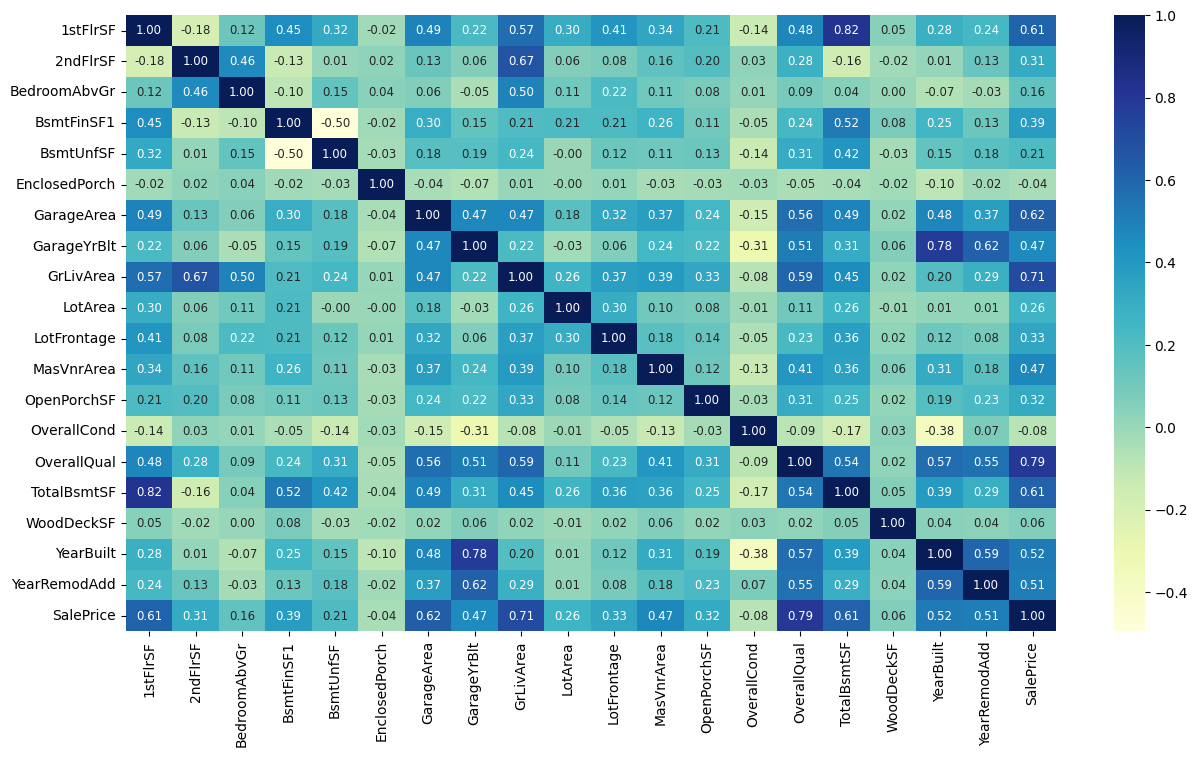

In [13]:
plt.figure(figsize=(15, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f", annot_kws={"size": 8.5})
plt.show()

I also applied heatmap analysis on the dataset obtained after performing OneHoteEncoding. Although the number of variables can make the analysis more difficult, I was looking to identify correlations with specific values for the categorical variables that might need to be considered when calibrating the predictive model.

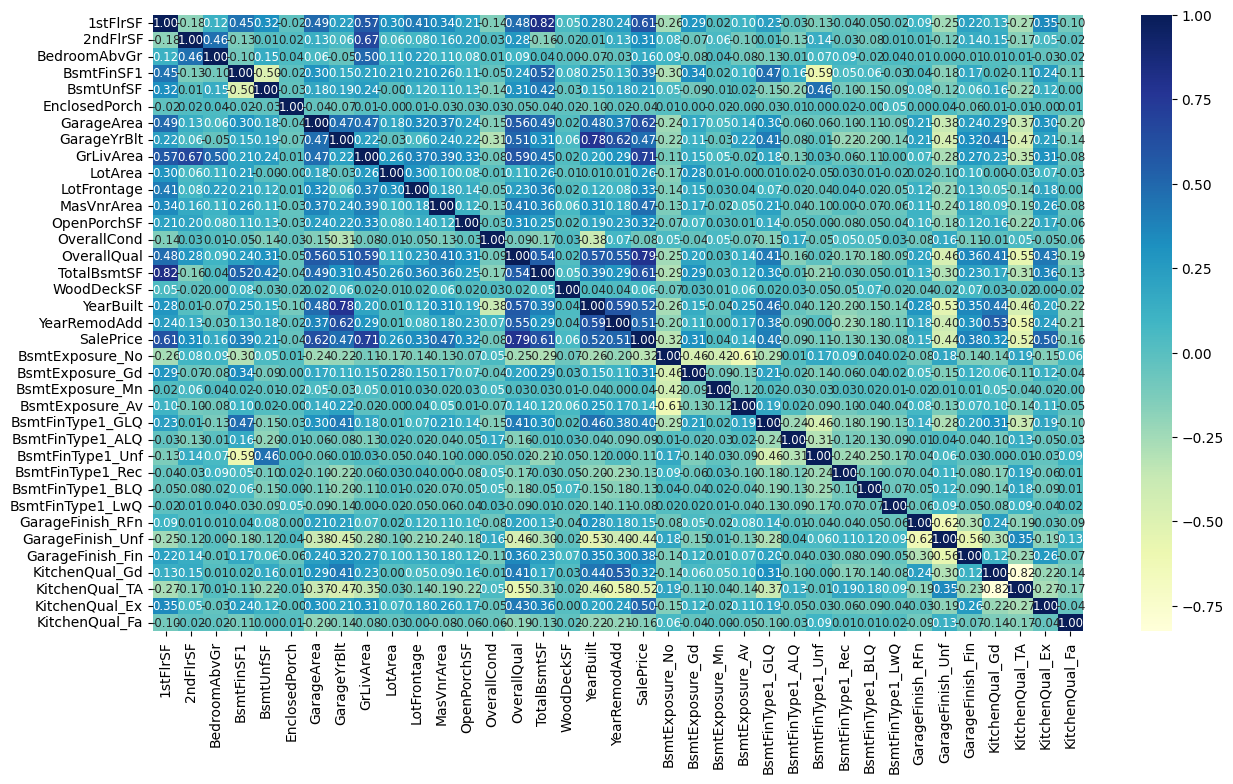

In [14]:
plt.figure(figsize=(15, 8))
corr_matrix = df_ohe.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f", annot_kws={"size": 8.5})
plt.show()

For the target variable (SalePrice) I used again .corr() applying both  **spearman** and **pearson** correlation methods, and identified the top 10 correlations for each method.

    * I know this command returns a pandas series and the first item is the correlation between SalePrice and SalePrice, which happens to be 1, so we exclude that with [1:].
    * I sorted values considering the absolute value, by setting key=abs.

In [15]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual         0.809829
GrLivArea           0.731310
YearBuilt           0.652682
GarageArea          0.649379
TotalBsmtSF         0.602725
KitchenQual_TA     -0.581803
1stFlrSF            0.575408
YearRemodAdd        0.571159
GarageYrBlt         0.563256
GarageFinish_Unf   -0.529975
Name: SalePrice, dtype: float64

Now we do the same for **pearson**

In [16]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

In both methods, we observe correlations between sales price and different variables. 
    
    * OverallQual is the most strongly correlated according to both methods.


    

* Ideally, we pursue strong correlation levels to sale price. The reason is that variables with higher correlation are likely to have higher predictive power and we should focus our predictive model on the variables with the highest predictive power.


We now obtained the top 8 correlation levels are considered from the variables in df_ohe.

In [17]:
top_n = 8
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'KitchenQual_TA',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

The fact that the list obtained by applying set above is 8 variables long is great news because it means that both methods, pearson and spearman yielded the same top 8 variables by correlation. This provides us reassurance that these variables are the ones we should focus our efforts towards delivering a good quality preictive model.

## Hypothesis 
Therefore, in our analysis of the DataFrame (df), we will explore the above variables to determine whether:

* A higher SalePrice is typically associated with the First Floor having a larger surface area **['1stFlrSF']**.

* A higher SalePrice is typically associated with a larger Size of garage area **['GarageArea']**.
* A higher SalePrice is typically associated with a larger above grade (ground) living area in square feet **['GrLivArea']**.
* A higher SalePrice is typically associated with a higher Rate of the overall material/quality and finish of the house **['OverallQual']**.
* A higher SalePrice is typically associated with the total square feet of the basement area **['TotalBsmtSF']**.
* A higher SalePrice is typically associated with the original construction date **['YearBuilt']**. 
* A higher SalePrice is typically associated with the remodel date **['YearRemodAdd']**.
* The assesment of kitchen quality has an impact on the final price **['KitchenQual']**.

In [18]:
initial_vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'KitchenQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
initial_vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'KitchenQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

# Exploratory Data Analysis (EDA) on selected variables

In [19]:
df_eda = df.filter(initial_vars_to_study + ['SalePrice']) # Filter out target variable and integrate to the feature variables
df_eda.head(5)

1stFlrSF  GarageArea  GrLivArea  OverallQual KitchenQual  TotalBsmtSF  \
0       856         548       1710            7          Gd          856   
1      1262         460       1262            6          TA         1262   
2       920         608       1786            7          Gd          920   
3       961         642       1717            7          Gd          756   
4      1145         836       2198            8          Gd         1145   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  
3       1915          1970     140000  
4       2000          2000     250000

# Variables Distribution by SalePrice
A visual ditribution representation (numerical) coloured by SalePrice

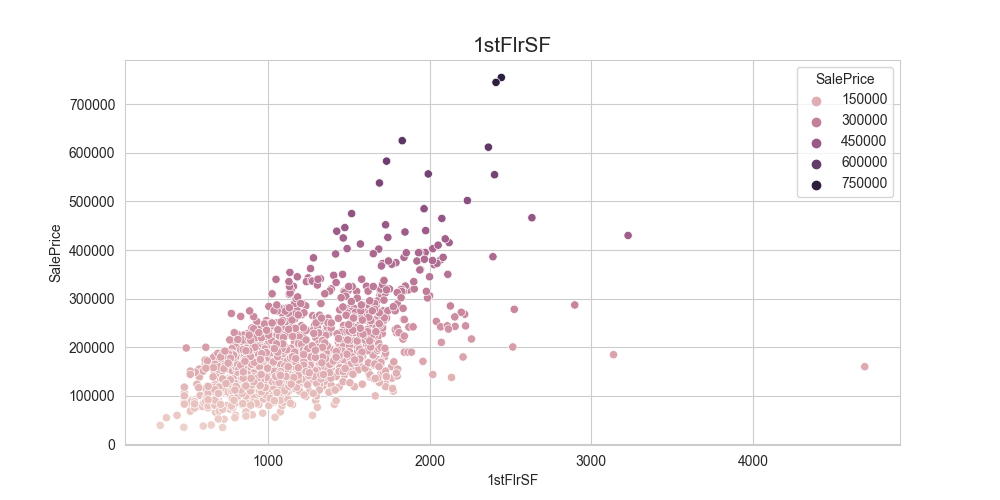

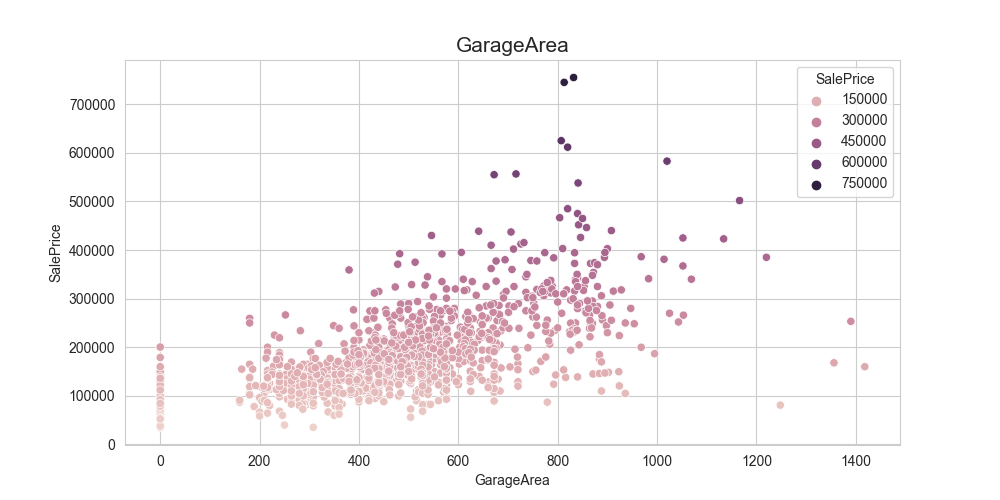

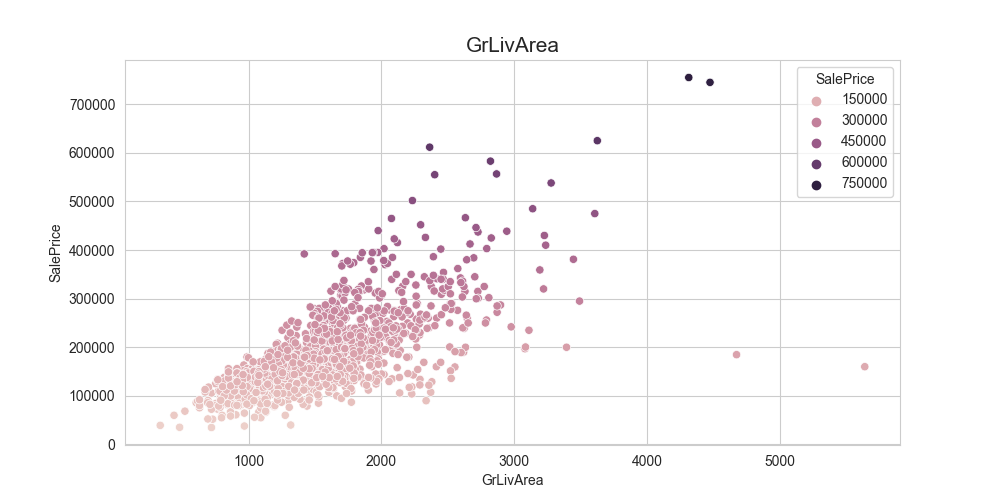

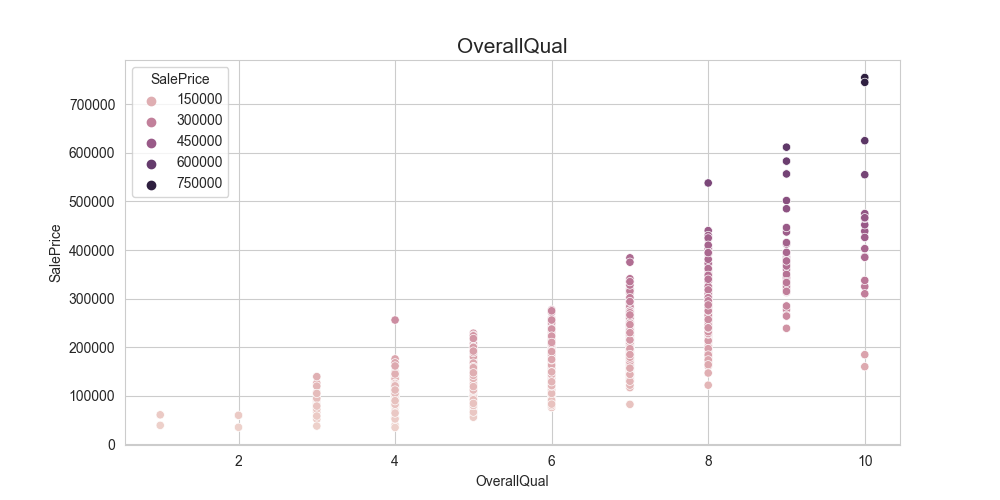

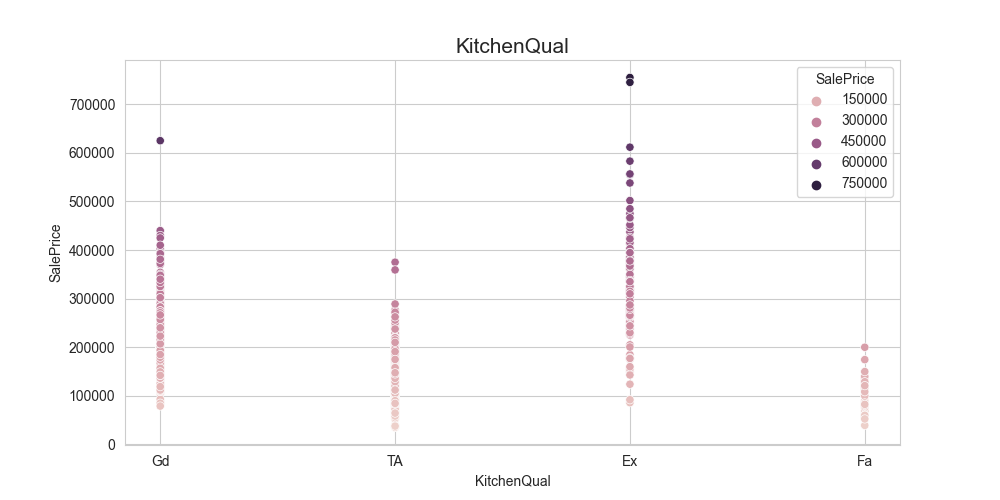

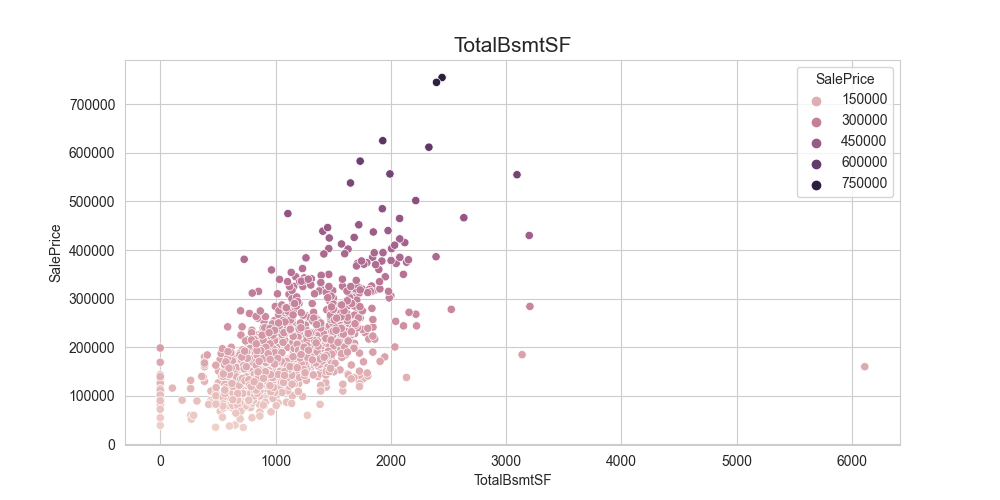

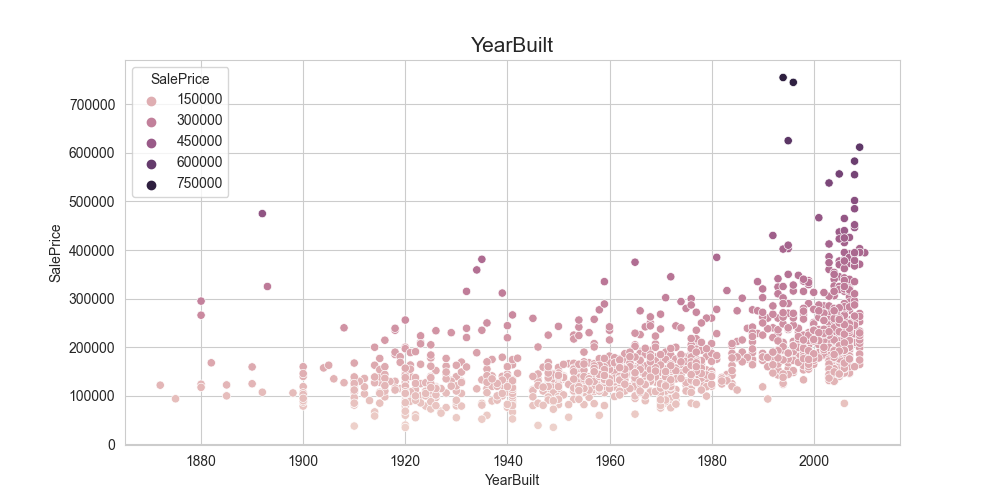

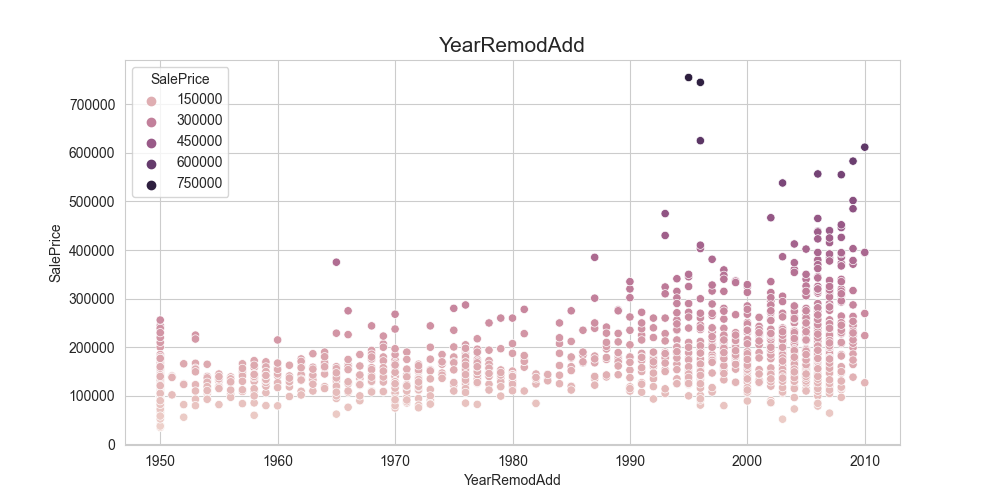

In [20]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
sns.set_style('whitegrid')
# print(col)
# print(target_var)

def numerical_plot(df, col, target_var):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=col, y=target_var, hue=target_var)
    plt.title(f"{col}", fontsize=15, y=1.0)
    # plt.show()
    plt.savefig('numerical_plot.png')
    plt.close()


target_var = "SalePrice"
# f_var = "OverallQual"
for col in initial_vars_to_study:
    numerical_plot(df_eda, col, target_var)
    print("\n\n")
    plot_path = 'numerical_plot.png'
    numerical_image = Image(plot_path)
    display(numerical_image)






# Conclusions and next steps
## Correlation and exceptions review

**Heatmap Correlation** : 
* It can be seen that the high correlations between certain variables with sales price are highlighted in darker blue wheras the opposite is seen to have more of a lighter colour. The features that are most correlated to sale price are OverallQual, GarageArea, GrLivArea, YearBuilt, TotalBsmtSF, KitchenQual and 1stFlrSF. These are likely to be important when it comes to predictability and we should pay special attention to them.

The plots and correlations interpretation coverage.

* A higher SalePrice is typically associated with the First Floor square feet having a larger surface area **['1stFlrSF']**.

* A higher SalePrice is typically associated with a higher quality kitchen **['KitchenQual']**.

* A higher SalePrice is typically associated with a larger Size of garage in square feet **['GarageArea']**.

* A higher SalePrice is typically associated with a larger Above grade (ground) living area in square feet **['GrLivArea']**.
* A higher SalePrice is typically associated with a higher Rate of the overall material and finish of the house **['OverallQual']**.
* A higher SalePrice is typically associated with a greater total square feet of the basement area **['TotalBsmtSF']**.

    The *TotalBsmtSF* variable contains an outlier with a value exceeding 6000 square feet. Such extreme values can skew the analysis and potentially mislead the model's predictions. It is crucial to address the existence of these outliers by either capping them at a reasonable threshold, by transforming the variable to reduce the impact of these anomalies or selecting a predictive model that is less effective by the existence of outliers, for example random forest. Handling outliers effectively ensures a more robust and reliable model, ultimately leading to more accurate predictions and insights.
* A higher SalePrice is typically associated with more recent years of construction **['YearBuilt']**. 

* A higher SalePrice is typically associated with more recent years of remodeling **['YearRemodAdd']**. 

    *YearRemodAdd* exhibits a very weak overall correlation with SalePrice. For properties remodeled before 1990, the sale prices do not vary significantly with the year of remodeling. However, for properties remodeled after 1990, there is a noticeable correlation where more recent remodels tend to be associated with higher sale prices. This suggests that while the remodeling year before 1990 does not substantially impact the property's value, more recent renovations can enhance the market value, reflecting modern updates and improvements.

## Selection of variables to study
### GarageYrBlt: 

* I decided dropping this variable due to its high correlation with YearBuilt, already included in the selection, as it might not add significant value to the dataset.

### Final selection of variables

**1stFlrSF (First Floor Square Feet)**

**GarageArea (Garage Area)**

**GrLivArea (Above Grade Living Area Square Feet)**
 
    This appears to be one of the most critical features for determining house value, as larger living areas above ground are generally more desirable and command higher prices.

**OverallQual (Overall Quality)**

    Higher quality ratings highly correlate with higher sale prices. This variable is very important for our predictive modeling as it encapsulates the general quality of the property.

**KitchenQual (Kitchen Quality)**

    High-quality kitchens are a significant selling point in homes and tend to increase property value. This variable is essential for understanding the appeal and marketability of the property.

**TotalBsmtSF (Total Basement Square Feet)**
 
    Larger basements are often valued highly, especially if finished. Note that outliers, such as basements larger than 6000 square feet, need careful handling as they can distort the overall analysis.

**YearBuilt (Year Built)**

    Older homes might have historical value, while newer homes may feature modern construction standards. It is essential to analyze how the age of the house affects its sale price.

**YearRemodAdd (Year Remodeled or Added)**

    Overall, this variable has a weak correlation with sale price. Before 1990, sale prices do not show significant variation with the remodeling year. However, for houses remodeled after 1990, there is some correlation, with more recent remodels often resulting in higher sale prices, indicating that modern updates add value.

    Recommendation
    I decided at this point to keep this variable given that we may be able to extract value from the data. 


In [21]:
final_vars_to_study = {'1stFlrSF', 'GarageArea', 'KitchenQual', 
'GrLivArea', 'OverallQual', 'TotalBsmtSF',
'YearBuilt', 'YearRemodAdd'}
final_vars_to_study

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}